## Урок 2. 

# Анализ данных и проверка статистических гипотез.

**План занятия**

* [Теоретическая часть](#theory)
    * [Теория вероятностей и математическая статистика](#prob_theory_and_math_stat)
    * [Что такое статистическая гипотеза?](#stat_hypothesis)
    * [Проверка статистических гипотез](#stat_hypothesis_test)
    * [Критерий Шапиро-Уилка](#shapiro_criterion)
    * [Критерий Стьюдента (t-test), двухвыборочный](#student_criterion)
    * [Критерий хи-квадрат (критерий согласия Пирсона)](#pirson_criterion)
    * [Доверительные интервалы](#conf_interval)
* [Практическая часть](#practice)
    * [Загрузка данных](#load_data)
    * [Анализ целевой переменной](#target_analysis)
    * [Анализ признакового пространства](#features_analysis)

## <center>Теоретическая часть<a class="anchor" id="theory"></a><center>

### Теория вероятностей и математическая статистика<a class="anchor" id="prob_theory_and_math_stat">

**Теория вероятностей** изучает модели случайных величин и свойства этих моделей.

**Математическая статистика и анализ данных** пытаются по свойствам конечных выборок определить свойства случайной величины, чтобы понять, как она будет вести себя в будущем.

### Что такое статистическая гипотеза?<a class="anchor" id="stat_hypothesis"></a>

**Статистическая гипотеза** - предположение о виде распределения и свойствах случайной величины, которое можно подтвердить или опровергнуть применением статистических методов к данным выборки.

**Нулевая гипотеза** - некоторое, принимаемое по-умолчанию предположение, о том, что не существует связи между двумя наблюдаемыми событиями, отклонения показателей и других неожиданных результатов, словом нет никакого эффекта.

**Альтернативная гипотеза** - в качестве альтернативы, как правило, выступает проверяемое предположение, но также бывает, что альтернатива не задана явно, в этом случаем рассматривают отрицание утверждение, заданного в нулевой гипотезе.

**Проверка статистической гипотезы** - это процесс принятия решения о том, противоречит ли рассматриваемая статистическая гипотеза наблюдаемой выборке данных.

**Статистический тест или статистический критерий** - строгое математическое правило, по которому принимается или отвергается статистическая гипотеза.

**Пример формализованного описания гипотезы**

$\large x^n = (x_1, .. , x_n), \: x^n \in X, \: X \sim P$<br>
$\large H_0: \: P \in \omega$<br>
$\large H_1: \: P \notin \omega$<br>
$\large T(x^n), \: T(x^n) \sim F_0(t) \: | \: H_0, \: T(x^n) \nsim F_0(t) \: | \: H_1$<br>

$\normalsize H_0$ - нулевая гипотеза<br>
$\normalsize H_1$ - альтернативная гипотеза<br>
$\normalsize X$ - случайная величина<br>
$\normalsize x^n$ - выборка размера $n$ из случайной величины $X$<br>
$\normalsize P$ - некоторое распределение случайной величины $X$<br>
$\normalsize \omega$ - некоторое семейство распределений<br>
$\normalsize T(x^n)$ - статистика от выборки $x^n$<br>
$\normalsize F_0(t)$ - нулевое распределение статистики<br>

В данном примере проверяется гипотеза $\normalsize H_0$ о том, что распределение $\normalsize P$ случайной величины $\normalsize X$, принадлежит некоторому семейству распределений, которое определёно нами заранее, допустим это семейство нормальных распределений. В качестве альтернативы выступает гипотеза $\normalsize H_1$, утверждающая, что распределение $\normalsize P$ принадлежит какому то иному семейству распределений.

Статистика $\normalsize T(x^n)$ и её нулевое распределение $\normalsize F_0(t)$ образуют *статистический критерий*.

### Проверка статистических гипотез<a class="anchor" id="stat_hypothesis_test"></a>

**Методика проверки статистических гипотез**

1. Cформулировать гипотезы $\normalsize H_0$ и $\normalsize H_1$
2. Выбрать подходящий статистический критерий, исходя из сформулированных гипотез, размера выборки(ок) и т.д.
3. Зафиксировать уровень значимости $\normalsize \alpha$
4. На множестве значений выбранной статистики $\normalsize T$ определить критическую область $\normalsize \Omega_\alpha$ наименее вероятных значений, таких, что $\normalsize P(T \in \Omega_\alpha | H_0) = \alpha$, как правило, рассматривается двусторонняя критическая область: 
$\normalsize (-\infty;x_{\alpha/2}) \cup (x_{1 - \alpha/2};+\infty)$
5. Рассчитать значение статистики $\normalsize T$ и достигаемые уровень значимости $\normalsize p-value^* = P(T \ge t \: | \: H_0)$
6. Если $\normalsize p-value < \alpha$, $\normalsize H_0$ отвергается в пользу $\normalsize H_1$, т.к вероятность получить такие данные (выборку), при верности $\normalsize H_0$, крайне мала.

*\*достигаемый уровень значимости, p-value* - это вероятность, при справедливости нулевой гипотезы, получить такое же распределение статистики, как в эксперименте, или ещё более экстремальное.


**Ошибки первого и второго рода**

Ошибка первого рода — когда нулевая гипотеза отвергается, хотя на самом деле она верна.<br>
Ошибка второго рода — когда нулевая гипотеза принимается, хотя на самом деле она не верна.<br>

|$H_0$             |**верная**                                    |**ложная**                                 |
|:----------------:|:--------------------------------------------:|:-----------------------------------------:|
|**принимается**   |$H_0$ верно принята                           |$H_0$ неверно принята (ошибка второго рода)|
|**отклоняется**   |$H_0$ неверно отвергнута (ошибка первого рода)|$H_0$ верно отвергнута                     |

В механизме проверки гипотез ошибки первого и второго рода неравнозначны, ошибка первого рода критичнее, любой корректный статистический критерий должен обеспечивать вероятность ошибки первого рода не больше, чем $\normalsize \alpha$,<br>
$\normalsize P(H_0 \: отвергнута \: | \: H_0) = P (p \le \alpha \: | \: H_0) \le \alpha$

Ошибка второго рода связана с понятием мощности статистического критерия,<br>
$\normalsize pow = P(H_0 \: отвергнута \: | \: H_1) = 1 - P(H_0 \: принята \: | \: H_1)$ - вероятность отклонить нулевую гипотезу, при верности альтернативы.

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Критерий Шапиро-Уилка<a class="anchor" id="shapiro_criterion"></a>

Данный критерий проверяет гипотезу о том, что некоторая случайная величина имеет нормальное распределение (распределение Гаусса). Необходимость проверять случайную величину на "нормальность", обусловлена тем, что многие статистические критерии и  аналитические методы из мат. статистики ориентированы на выборки из нормально распределённых случайных вечличин и перед их использование необходимо убедиться в том, что закон распределния приближен к нормальному.

Помимо этого нормально распределённые случайные величины обладают некоторыми полезными свойствами, которые могут быть полезны в процессе работы с ними  (http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%A8%D0%B0%D0%BF%D0%B8%D1%80%D0%BE-%D0%A3%D0%B8%D0%BB%D0%BA%D0%B0).

**Нормальное распределение**

<img src="normal_distr.png">

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: X \sim N(\mu, \sigma^2)$<br>
$\large H_1: \: H_0 \: неверна$<br>

$\large W(x^n) = \frac{(\sum_{i=1}^n a_i x_i)^2}{\sum_{i=1}^n (x_i - \bar{x})^2} $<br>

Нулевое распределение статистики - табличное.

In [65]:
from scipy.stats import shapiro, normaltest, ttest_rel, ttest_ind, kstest

In [66]:
import warnings
warnings.simplefilter('ignore')

In [139]:
N=500
t = np.linspace(-5,10,N)
xx = np.random.randn(N)
yy = np.random.randn(N)+5

Гистограмма
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

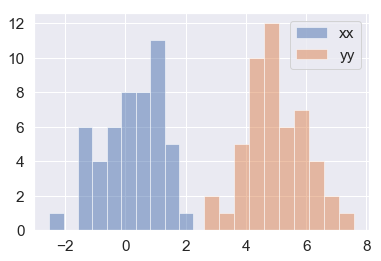

In [131]:
n_bins = 10
plt.hist(xx, alpha=0.5,label='xx', bins=n_bins)
plt.hist(yy, alpha=0.5,label='yy',bins=n_bins)
plt.legend()
plt.show()

график плотности распределения kdeplot https://seaborn.pydata.org/generated/seaborn.kdeplot.html (Kernel Density Estimate)

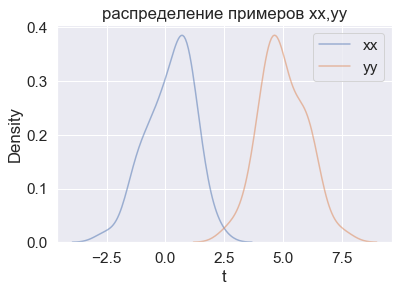

In [132]:
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(yy,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение примеров xx,yy')
plt.show()

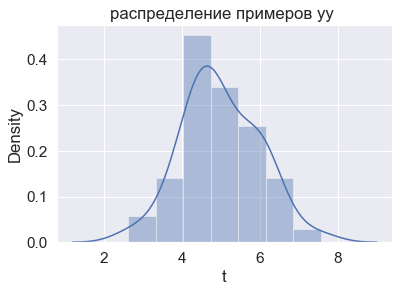

In [133]:
sns.distplot(yy)
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение примеров yy ')
plt.show()

Q-Q диаграмма
https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot.html

In [134]:
from statsmodels.graphics.gofplots import qqplot

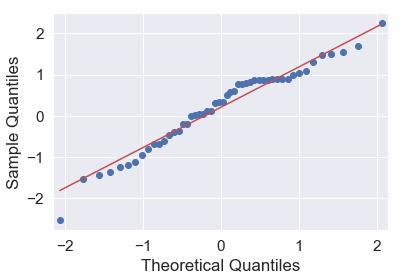

In [135]:
# q-q plot
qqplot(xx, line='s')
plt.show()

Коробка

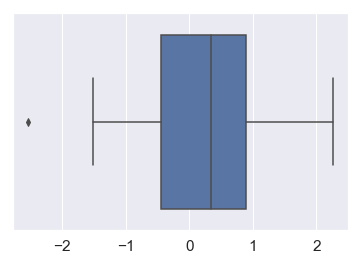

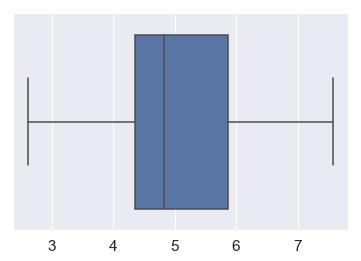

In [136]:
sns.boxplot(xx)
plt.show()
sns.boxplot(yy)
plt.show()

тесты на  SciPy 

значение p:

 - p <= alpha : отклонить H0, не нормально.
 - p> alpha : не отклонить H0, нормально.

In [137]:
# Шапиро-Уилк
c,p = shapiro(xx)
print(c, p)

#D’Agostino’s K2 test
c,p = normaltest(xx)
print(p)

# Колмогоров-Смирнов
c,p = kstest(xx, 'norm')
print(p)

0.9683201909065247 0.1975865215063095
0.32207382074968993
0.034912340248911766


Распредление, которое НЕ является нормальным 

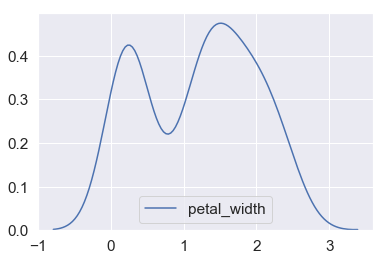

In [75]:
iris = sns.load_dataset("iris")
sns.kdeplot(iris.iloc[:,3])
plt.show()

In [76]:
c,p = shapiro(iris.iloc[:,3])
print(c, p)
c,p = normaltest(iris.iloc[:,3])
print(p)
c,p = kstest(iris.iloc[:,3], 'norm')
print(p)

0.9018341898918152 1.680291461525485e-08
1.3492785927137586e-30
0.0


logistic :  4.010611931448693e-08 3.910645660045072e-11 1.0036416142611415e-13


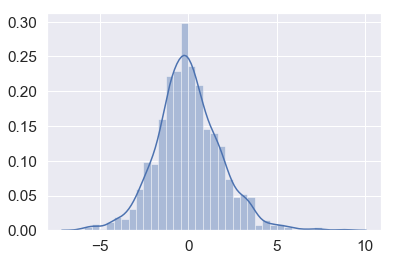

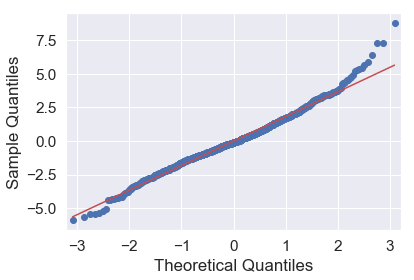

loggamma : 4.598575283836469e-26 1.988222639445073e-65 0.0


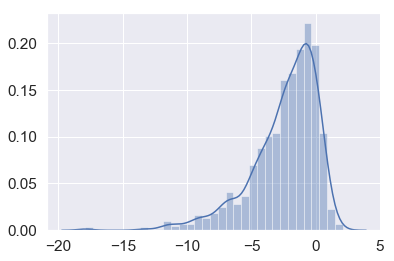

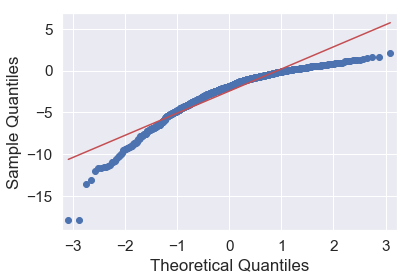

In [77]:
from scipy.stats import logistic,  loggamma, norm
c = 0.414
r2 = loggamma.rvs(c, size=1000)
r1 = logistic.rvs(size=1000)

c,p11 = shapiro(r1)
c,p12 = normaltest(r1)
c,p13 = kstest(r1, 'norm')
print('logistic : ',p11,p12,p13)

sns.distplot(r1)
plt.show()
qqplot(r1, line='s')
plt.show()

c,p21 = shapiro(r2)
c,p22 = normaltest(r2)
c,p23 = kstest(r2, 'norm')
print('loggamma :',p21,p22,p23)


sns.distplot(r2)
plt.show()
qqplot(r2, line='s')
plt.show()



ССылки:
    Практика применения тестов: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
    стат. методы по простому: http://statsoft.ru/home/textbook/default.htm
    непараметрические методы (по простому): http://statsoft.ru/home/textbook/modules/stnonpar.html
    лекции по прикладной мат.стат (1-я стат.критерии и законы распределения, 2-я проверка непараметрических гипотез, 3-я проверка параметрических гипотез): http://www.machinelearning.ru/wiki/images/b/b5/Psad_intro.pdf, http://www.machinelearning.ru/wiki/images/b/bf/Psad_ht_nonparametric.pdf, http://www.machinelearning.ru/wiki/images/3/3b/Psad_ht_parametric.pdf
    Теория оценки распределений:https://yadi.sk/d/1Kx3PN8a3SGopv
    

### Критерий Стьюдента (t-test), двухвыборочный<a class="anchor" id="student_criterion"></a>

Критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента.<br> Наиболее часто данные критерии применяются для проверки равенства средних значений (мат. ожиданий) в двух выборках.

**Формализованное описание**

$\large x_1^{n_1} = (x_{11}, .. , x_{1{n_1}}), \: x_1^{n_1} \in X_1, \: X_1 \sim N(\mu_1, \sigma_1^2), \sigma_1 неизвестна$<br>
$\large x_2^{n_2} = (x_{21}, .. , x_{2{n_1}}), \: x_2^{n_2} \in X_2, \: X_2 \sim N(\mu_2, \sigma_2^2), \sigma_2 неизвестна$<br>

$\large H_0: \: \mu_1 = \mu_2$<br>
$\large H_1: \: \mu_1 <\ne> \mu_2$<br>

$\large T(x_1^{n_1}, x_2^{n_2}) = \frac{\bar{x_1} \: - \: \bar{x_2}}{\sqrt{\frac{S_1^2}{n_1} - \frac{S_2^2}{n_2}}}$<br>
$\large T(x_1^{n_1}, x_2^{n_2}) \sim St$

**Условия применения**

* нормальное распределение, отсутствие выбросов
* размер выборки не меньше 30 наблюдений

Если данные не отвечают этим критериям, то применяется *U критерий Манна-Уитни* - это непараметрический тест, в котором для расчета используются не исходные данные, а их ранговые позиции. 

Если групп больше двух, подойдет *критерий Краскела-Уоллиса*.

Если выборок две и они зависимые применяется ранговый Т-критерий Уилкоксона.

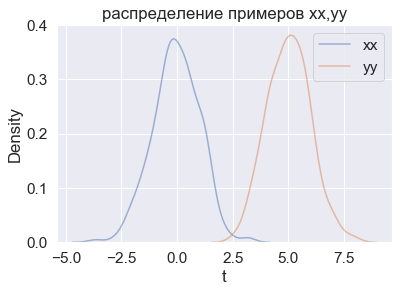

1.7664514192421324e-280


In [140]:
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(yy,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение примеров xx,yy')
plt.show()

c,p = ttest_rel(xx,yy)
print(p)

0.7380145516562027


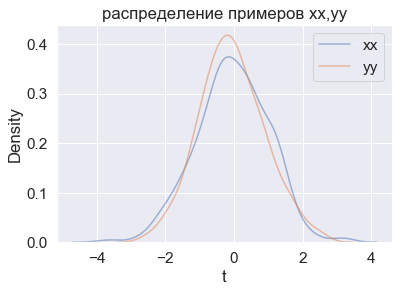

In [141]:
xx_new = np.random.randn(N)
c,p = ttest_rel(xx,xx_new)
print(p)
sns.kdeplot(xx,alpha=0.5,label='xx')
sns.kdeplot(xx_new,alpha=0.5,label='yy')
plt.xlabel('t')
plt.ylabel('Density')
plt.title('распределение примеров xx,yy')
plt.show()

Двухвыборочный тест Колмогорова-Смирнова (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp)

In [80]:
from scipy.stats import ks_2samp, chi2_contingency

In [81]:
ks_2samp(xx,xx_new)

Ks_2sampResult(statistic=0.055999999999999994, pvalue=0.40310260702007983)

In [143]:
# from scipy.stats import ks_2samp
rvs1 = norm.rvs(size=100, loc=0., scale=1)
rvs2 = norm.rvs(size=299, loc=0.5, scale=1.5)
ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.22137123745819398, pvalue=0.0010297804140261483)

### Критерий хи-квадрат (критерий согласия Пирсона)<a class="anchor" id="pirson_criterion"></a>

Критерий хи-квадрат позволяет оценить значимость различий между фактическим (выявленным в результате исследования) количеством исходов и теоретическим количеством, которое можно ожидать в изучаемых группах при справедливости нулевой гипотезы. Выражаясь проще, метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

**Формализованное описание**

$\large x^n = (x_1, .. , x_n), \: x^n \in X$<br>

$\large H_0: \: Эмпирические \: (наблюдаемые) \: и \: теоретические \: (ожидаемые) \: частоты \: согласованы$ <br>
$\large H_1: \: H_0 \: неверна$<br>

$\large \chi^2(x^n) = \sum_{i=1}^K \frac{(O_i - E_i)^2}{E_i}$<br>
$O$ (Observed) - наблюдаемые частоты<br> 
$E$ (Expected) - ожидаемые частоты<br>
$K$ - количество оцениваемых частот

$\large \chi^2(x^n) \sim \chi^2$

**Условия применения**

Сопоставляемые группы должны быть независимыми, то есть критерий хи-квадрат не должен применяться при сравнении наблюдений "до-после" или связанных пар. Аналог для зависимых выборок - *тест Мак-Немара* или *Q-критерий Кохрена* для сравнения трех и более групп.

Если в ячейке меньше 10 наблюдений, применяется *поправка Йетса*. 

Если меньше 5, то вместо хи-квадрат используется *точный тест Фишера*.

In [145]:
obs = np.array([[10, 10, 20], [50, 20, 20]])
g, p, dof, expctd = chi2_contingency(obs)
p

0.0018009437526656726

In [146]:
from scipy.stats import poisson,  planck

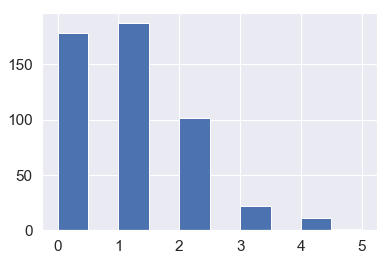

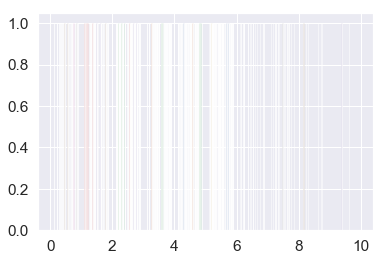

In [152]:
mu1 = 1
r = poisson.rvs(mu1, size=500)

lambda_ = 1
y = planck.rvs(lambda_, size=500)+np.random.randint(6,size=(1,500))

new_data = pd.DataFrame(np.hstack([r.reshape((-1,1)),y.reshape((-1,1))]),columns=['r','y'])
new_data['id']=np.arange(500)
plt.hist(r)
plt.show()
plt.hist(y, alpha=0.5)
plt.show()

In [148]:
new_data.head()

,r,y,id
0,0,3,0
1,1,5,1
2,0,2,2
3,1,3,3
4,2,3,4


In [149]:
table = new_data.pivot_table( values='id', index='y', columns='r', aggfunc='count')
table.fillna(0,inplace =True)
table = table+5 # добавиМ +5 искусственно, Т.К. не дает верных результатов для частот меньше 5
table

r,0,1,2,3,4,5
y,,,,,,
0,24.0,33.0,12.0,7.0,6.0,5.0
1,33.0,30.0,18.0,8.0,5.0,5.0
2,32.0,32.0,27.0,15.0,7.0,5.0
3,29.0,26.0,16.0,9.0,7.0,7.0
4,39.0,40.0,24.0,11.0,6.0,5.0
5,34.0,37.0,19.0,11.0,5.0,5.0
6,14.0,14.0,10.0,6.0,6.0,5.0
7,11.0,10.0,7.0,5.0,6.0,5.0
8,7.0,6.0,7.0,5.0,5.0,5.0


In [150]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.5762477158309167

In [151]:
i1=4
j1=5
i2=2
j2=3
print(table.iloc[[i1,j1],[j2,i2]])
chi2, p, dof, expected = chi2_contingency(table.iloc[[i1,j1],[i2,j2]], correction=False)
p

r     3     2
y            
4  11.0  24.0
5  11.0  19.0


0.6563796257894831

### Доверительные интервалы<a class="anchor" id="conf_interval"></a>

Вид интервальной оценки, которая задаёт числовые границы, в которых, с определённой вероятностью, находится истинное значение оцениваемого параметра.

**Порядок расчета доверительного интервала (для мат. ожидания)**

1. Задать уровень достоверности (confidence level), $\normalsize \alpha = 95\% = 0.95$
2. Найдите по таблице Z-оценок или рассчитать коэффициент достоверности (confidence coefficient) - $\normalsize Z_{\alpha/2}$, для $\normalsize \alpha = 0.95, Z_{\alpha/2} = 1.96$
3. Рассчитать доверительный интервал (confidence interval), $\normalsize CI = \bar{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$,<br>
где $\normalsize \bar{x}$ - выборочное среднее, $\normalsize \sigma$ - стандартное отклонение, $\normalsize n$ - размер выборки

## <center>Практическая часть<a class="anchor" id="practice"></a><center>

**Подключение библиотек и скриптов**

In [153]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [154]:
import warnings
warnings.simplefilter('ignore')

**Пути к директориям и файлам**

In [155]:
DATASET_PATH = 'training_project_data.csv'
PREP_DATASET_PATH = 'training_project_data_prep.csv'

### Загрузка данных<a class="anchor" id="load_data"></a>

**Описание базового датасета**

* **LIMIT_BAL** - Сумма предоставленного кредита
* **SEX** - Пол (1=мужчина, 2=женщина)
* **EDUCATION** - Образование (1=аспирантура, 2=университет, 3=старшая школа, 4=прочее, 5=неизвестно, 6=неизвестно)
* **MARRIAGE** - Семейное положение (1=женат/замужен, 2=не женат/не замуженм, 3=прочее)
* **AGE** - Возраст (в годах)
* **PAY_1** - Статус погашения в Сентябре (-1=погашен полностью, 0=погашен частично, 1=отсрочка платежа на один месяц, .., 3=отсрочка платежа на три месяца и более)
* **PAY_2** - Статус погашения в Августе
* **PAY_3** - Статус погашения в Июле
* **PAY_4** - Статус погашения в Июне
* **PAY_5** - Статус погашения в Мае
* **PAY_6** - Статус погашения в Апреле
* **BILL_AMT1** - Сумма выписки по счету в Сентябре
* **BILL_AMT2** - Сумма выписки по счету в Августе
* **BILL_AMT3** - Сумма выписки по счету в Июле
* **BILL_AMT4** - Сумма выписки по счету в Июне
* **BILL_AMT5** - Сумма выписки по счету в Мае
* **BILL_AMT6** - Сумма выписки по счету в Апреле
* **PAY_AMT1** - Сумма предыдущего платежа в Сентябре
* **PAY_AMT2** - Сумма предыдущего платежа в Августе
* **PAY_AMT3** - Сумма предыдущего платежа в Июле
* **PAY_AMT4** - Сумма предыдущего платежа в Июне
* **PAY_AMT5** - Сумма предыдущего платежа в Мае
* **PAY_AMT6** - Сумма предыдущего платежа в Апреле
* **NEXT_MONTH_DEFAULT** - Просрочка платежа в следующем месяце (1=да, 0=нет)

In [156]:
df_base = pd.read_csv(DATASET_PATH)
df = pd.read_csv(PREP_DATASET_PATH)

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_4_2,PAY_4_3,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3
0,150000.0,2,2,2,24,1,2,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,50000.0,2,3,1,46,3,3,3,3,2,...,0,1,0,0,1,0,0,1,0,0
2,150000.0,2,2,1,41,-1,-1,-1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,150000.0,2,2,2,35,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,70000.0,2,1,1,35,1,2,2,2,2,...,1,0,0,0,1,0,0,1,0,0


**Выделение целевой переменной и групп признаков**

In [157]:
TARGET_NAME = 'NEXT_MONTH_DEFAULT'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()
NEW_FEATURE_NAMES = df.columns.drop([TARGET_NAME] + BASE_FEATURE_NAMES)

### Анализ целевой переменной<a class="anchor" id="target_analysis"></a>

**Обзор распределения**

In [158]:
df[TARGET_NAME].value_counts()

0    7805
1    2195
Name: NEXT_MONTH_DEFAULT, dtype: int64

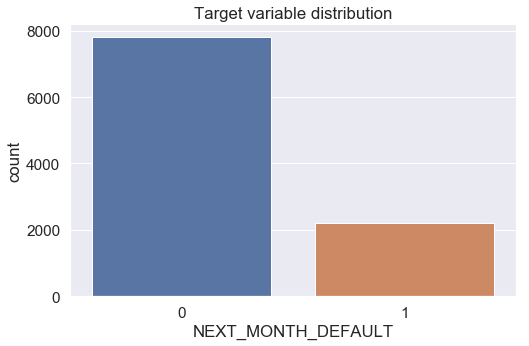

In [159]:
plt.figure(figsize=(8, 5))

sns.countplot(x=TARGET_NAME, data=df)

plt.title('Target variable distribution')
plt.show()

**Корреляция с базовыми признаками**

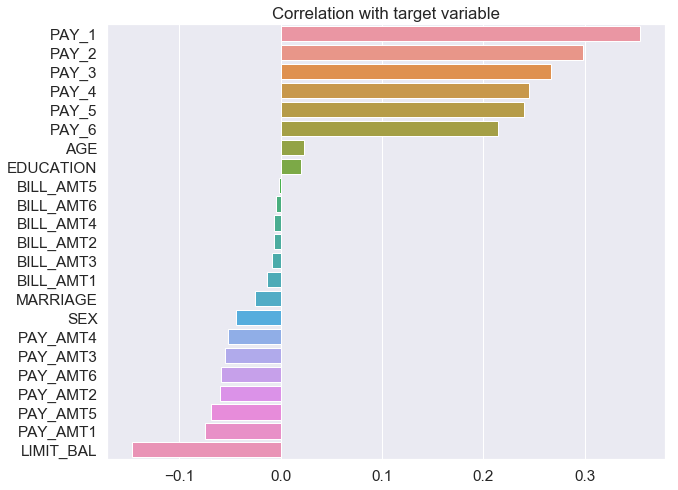

In [97]:
corr_with_target = df[BASE_FEATURE_NAMES + [TARGET_NAME]].corr().iloc[:-1, -1].sort_values(ascending=False)

plt.figure(figsize=(10, 8))

sns.barplot(x=corr_with_target.values, y=corr_with_target.index)

plt.title('Correlation with target variable')
plt.show()

**Оценка признака "PAY_1" в разрезе целевой переменной**

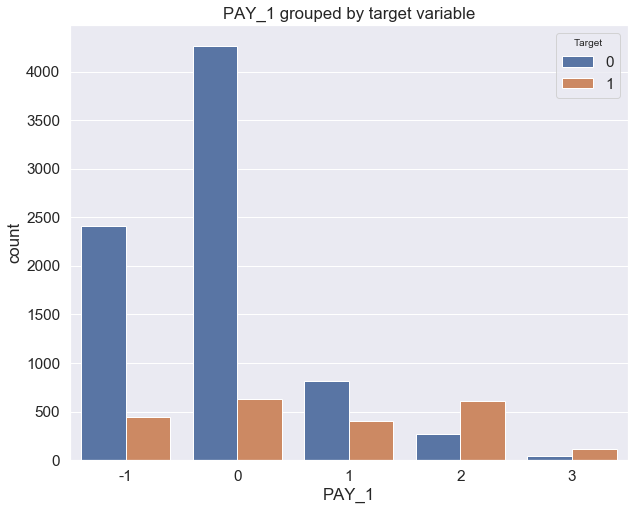

In [98]:
plt.figure(figsize=(10, 8))

sns.countplot(x="PAY_1", hue=TARGET_NAME, data=df)
plt.title('PAY_1 grouped by target variable')
plt.legend(title='Target', loc='upper right')

plt.show()

**Наблюдение**

Изучив получившийся график, видно, что значения -1 (погашен полностью) и 0 (погашен частично) признака PAY_1 имеют схожие доли в разрезе целевой переменной. Если это действительно так, то можно будет, например, объединить их в одну категорию.

**Гипотеза** 

* Нулевая гипотеза: ожидаемые и наблюдаемые частоты согласованы
* Альтернативная гипотеза: отклонения в частотах выходят за рамки случайных колебаний, расхождения статистически значимы
* Критерий: Хи-квадрат Пирсона
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Для проверки данной гипотезы необходимо подать наблюдаемые частоты категорий -1 и 0 признака PAY_1 в выбранный критерий, после чего оценить значение достигаемого уровня значимости p-value и сравнить с его с выбранным порогом альфа, если p-value получится больше выбранного порога, то гипотезу о согласованности частот можно не отбрасывать.

*Сформируем выборку и рассчитаем наблюдаемые частоты*

In [99]:
pay1_and_target_s = df.loc[df['PAY_1'].isin([-1, 0]), ['ID', 'PAY_1', 'NEXT_MONTH_DEFAULT']].sample(1000)

In [100]:
table = pay1_and_target_s.pivot_table(values='ID', index='PAY_1', columns='NEXT_MONTH_DEFAULT', aggfunc='count')
table

NEXT_MONTH_DEFAULT,0,1
PAY_1,,
-1,301,43
0,578,78


*Проверим нашу гипотезу используя критерий Хи-квадрат Пирсона*

In [101]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.7788126828710433

P-value получилось больше выбранного уровня значимости, соответственно у нас нет оснований для отвержения нулевой гипотезы и можно допустить, что категории -1 (погашен полностью) и 0 (погашен частично) одинаково влияют на целевую переменную и их можно объединить в одну категорию. 

\*Для других признаков PAY_2, PAY_3, и т.д. следует провести аналогичный анализ и после этого решать о целесообразности изменения категорий или построения новых признаков.

In [102]:
pay2_and_target_s = df.loc[df['PAY_1'].isin([3, 2]), ['ID', 'PAY_1', 'NEXT_MONTH_DEFAULT']].sample(1000)

In [103]:
table = pay2_and_target_s.pivot_table(values='ID', index='PAY_1', columns='NEXT_MONTH_DEFAULT', aggfunc='count')
table

NEXT_MONTH_DEFAULT,0,1
PAY_1,,
2,264,587
3,43,106


In [104]:
chi2, p, dof, expected = chi2_contingency(table, correction=False)
p

0.5974164944353059

**Оценка признака "LIMIT_BAL" в разрезе целевой переменной**

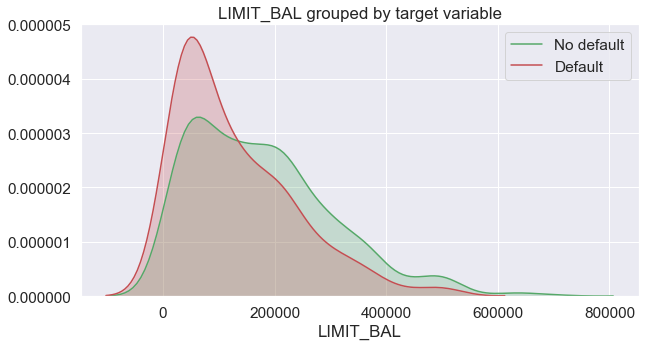

In [160]:
limit_bal_with_target_s = df[['LIMIT_BAL', TARGET_NAME]].sample(1000)
limit_bal_s = limit_bal_with_target_s['LIMIT_BAL']
limit_bal_target_0 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 0]
limit_bal_target_1 = limit_bal_s[limit_bal_with_target_s[TARGET_NAME] == 1]

plt.figure(figsize=(10, 5))

sns.kdeplot(limit_bal_target_0, shade=True, label='No default', color='g')
sns.kdeplot(limit_bal_target_1, shade=True, label='Default', color='r')

plt.xlabel('LIMIT_BAL')
plt.title('LIMIT_BAL grouped by target variable')
plt.show()

**Наблюдение**

Похоже что две группы, полученные в результате разбиения признака "LIMIT_BAL" по целевой переменной, имеют различные распределения, что может помочь при построение модели, т.к. это будет означать, что между признаком "LIMIT_BAL" и целевой переменной, возможно, существует некоторая функциональная зависимость.

**Гипотеза** 
* Нулевая гипотеза: средние значения в двух независимых выборках равны
* Альтернативная гипотеза: средние значения в двух независимых выборках различаются
* Критерий: критерий Стьюдента (t-тест) и его аналоги
* Уровень значимости $\normalsize \alpha$: 0.05
* Критическая область: двухсторонняя

Что бы проверить данную гипотезу сравним две выборки из рассматриваемых групп на предмет равенства средних значений.
Если вероятность того, что мат. ожидания в исходных группах равны, при данных выборках, буде менее 5%, то можно будет говорить о том, что скорее всего выборки имеют различные распределения.

*Проверка распределения признака на "нормальность" с помощью критерия Шапиро-Уилка*

In [161]:
shapiro(limit_bal_s)

(0.9176560640335083, 6.742171382604353e-23)

По полученному значению p-value, которое сильно меньше 0.05, можем заключить, что гипотеза о "нормальности" отвергается.

*Для достоверности произведём визуальную оценку распределения признака, а так же построим QQ-график*

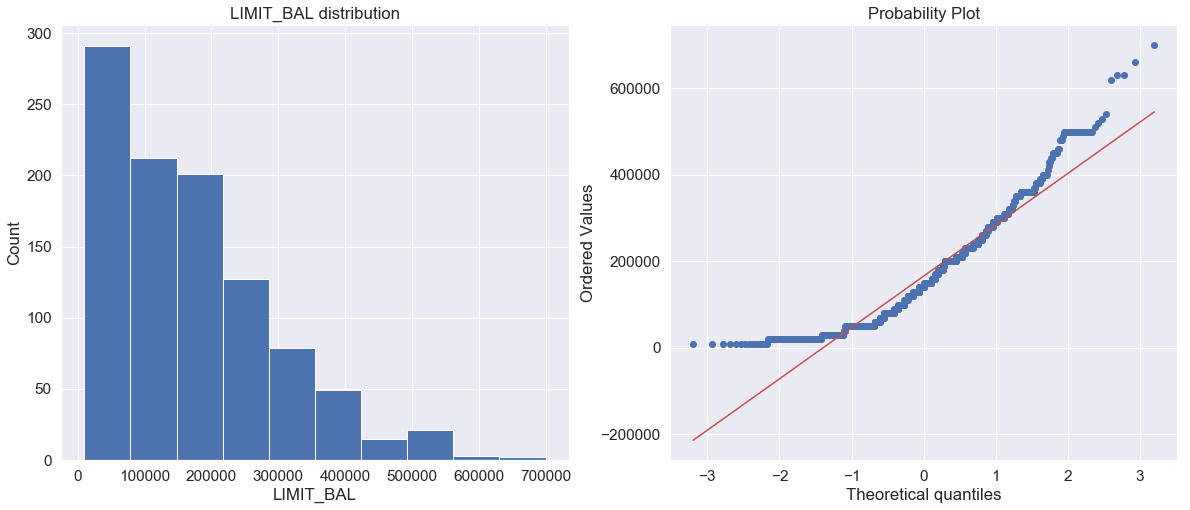

In [162]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
limit_bal_s.hist()

plt.subplot(122)
probplot(limit_bal_s, dist='norm', plot=plt)

plt.show()

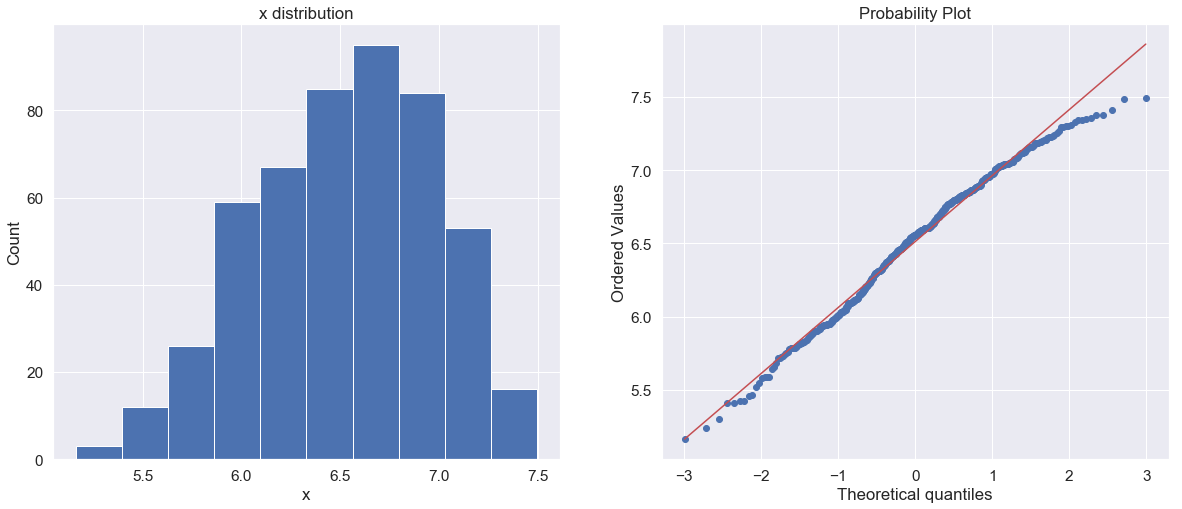

In [163]:


x = loggamma.rvs(5, size=500) + 5
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('x')
ax1.set_ylabel('Count')
ax1.set_title('x distribution')
plt.hist(x)

plt.subplot(122)
probplot(x, dist='norm', plot=plt)

plt.show()

3.040474617044061


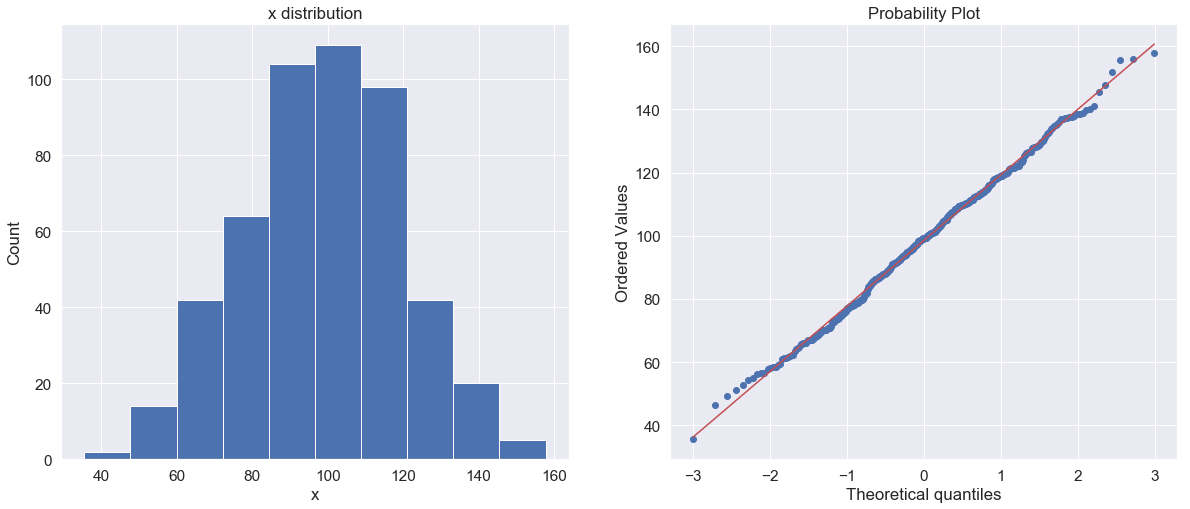

In [109]:
from scipy.stats import boxcox
xt, lmbda = boxcox(x)
print(lmbda)
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('x')
ax1.set_ylabel('Count')
ax1.set_title('x distribution')
plt.hist(xt)

plt.subplot(122)
probplot(xt, dist='norm', plot=plt)

plt.show()

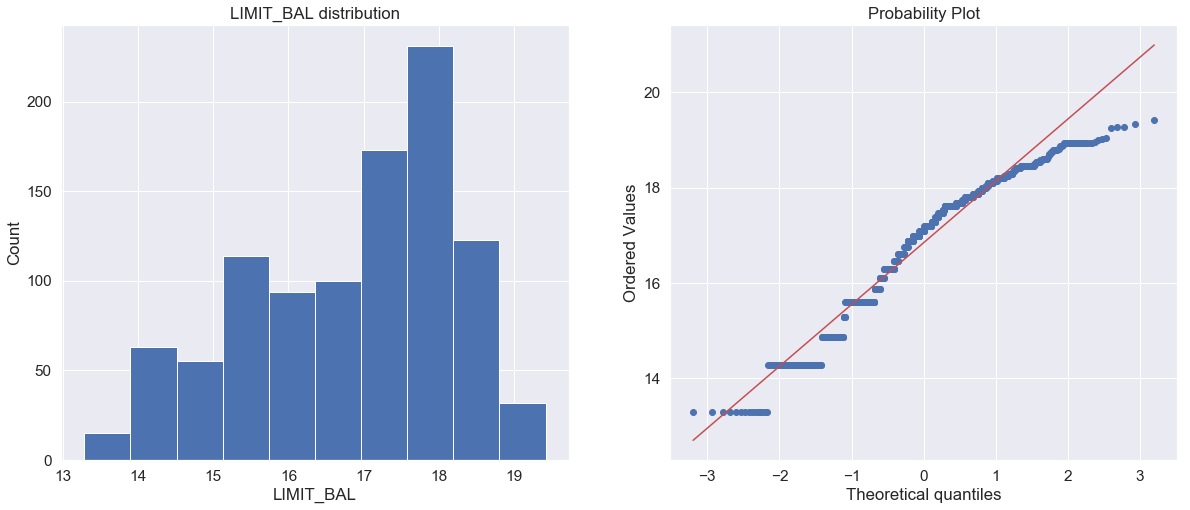

In [164]:
limit_bal_log=np.log(limit_bal_s)/np.log(2)


plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
limit_bal_log.hist()

plt.subplot(122)
probplot(limit_bal_log, dist='norm', plot=plt)

plt.show()

In [165]:
shapiro(limit_bal_log)

(0.9524196982383728, 1.8273318049441614e-17)

In [166]:
from scipy.stats  import boxcox
limit_bal_BC, lmax_mle = boxcox(limit_bal_s)

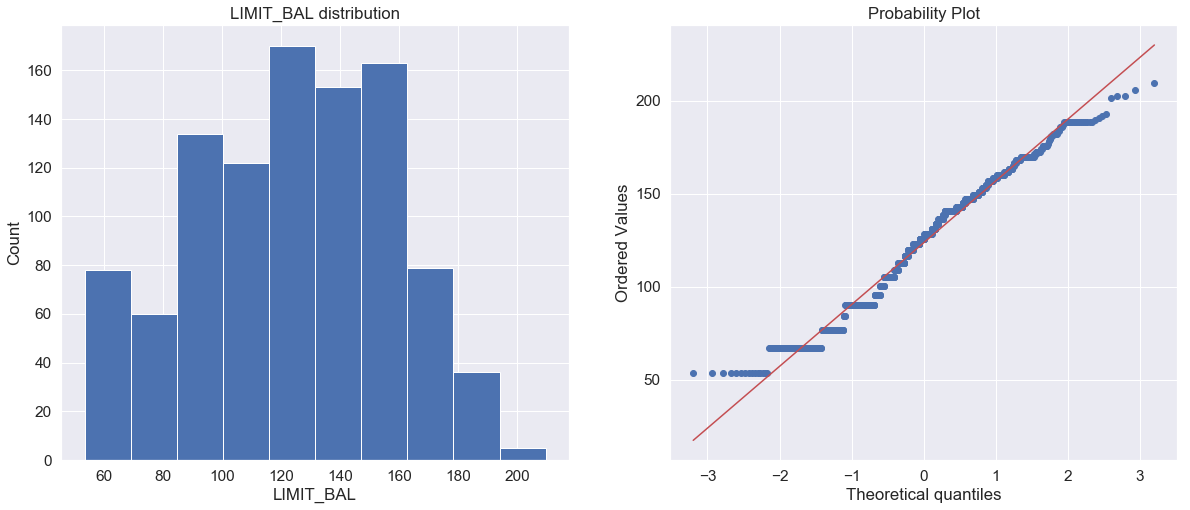

In [167]:
plt.figure(figsize=(20, 8))

ax1 = plt.subplot(121)
ax1.set_xlabel('LIMIT_BAL')
ax1.set_ylabel('Count')
ax1.set_title('LIMIT_BAL distribution')
plt.hist(limit_bal_BC)

plt.subplot(122)
probplot(limit_bal_BC, dist='norm', plot=plt)

plt.show()

In [168]:
shapiro(limit_bal_BC)

(0.978747546672821, 6.480784658924321e-11)

Визуальная оценка подтверждает показания критерия Шапиро-Уилка по поводу того, что закон распределения отличный от "нормального", в связи с чем, мы не сможем воспользоваться критерием Стьюдента для проверки гипотезы о равности мат. ожиданий признака LIMIT_BAL в группах с просроченным и непросроченным платежом в следующем месяце, но мы сможем воспользоваться его непараметрическим аналогом - критерием Манна-Уитни, который не требователен к закону распределения.

*Оценим эквивалентность мат. ожадиний, в исследуемых группах, с помощью критерия Манна-Уитни*

In [169]:
mannwhitneyu(limit_bal_target_0, limit_bal_target_1)

MannwhitneyuResult(statistic=70167.0, pvalue=1.7342893220192942e-08)

Согласно значению p-value, гипотеза о равности мат. ожиданий отвергается, но стоит ради дополнительной проверки обратиться к доверительным интервалам.

*Построим доверительные интервалы для средних значений, каждой из двух групп и сравним их*

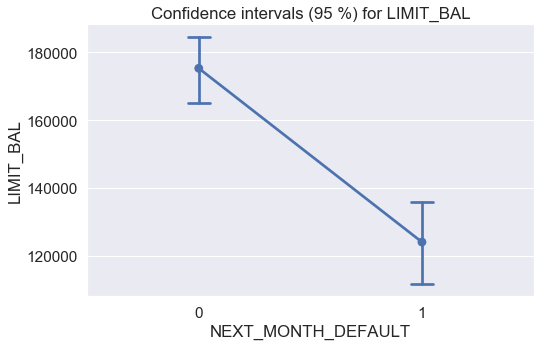

In [116]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y='LIMIT_BAL', data=limit_bal_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for LIMIT_BAL')
plt.show()

In [176]:
PAY_AMT='PAY_AMT6'

PAY_AMT_with_target_s = df[[PAY_AMT, TARGET_NAME]].sample(1000)
PAY_AMT_s = PAY_AMT_with_target_s[PAY_AMT]
PAY_AMT_0 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 0]
PAY_AMT_1 = PAY_AMT_s[PAY_AMT_with_target_s[TARGET_NAME] == 1]


In [177]:
mannwhitneyu(PAY_AMT_0, PAY_AMT_1)

MannwhitneyuResult(statistic=70940.0, pvalue=6.857351545087807e-05)

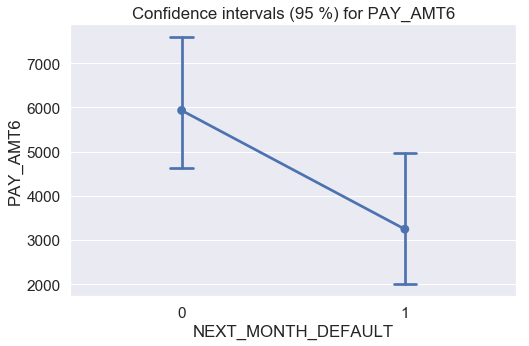

In [178]:
plt.figure(figsize=(8, 5))

sns.pointplot(x=TARGET_NAME, y=PAY_AMT, data=PAY_AMT_with_target_s, capsize=.1)

plt.title('Confidence intervals (95 %) for '+PAY_AMT)
plt.show()

По данному графику так же видно, что интервалы, в которых с 95% вероятностью должны находится истинные мат. ожидания этих двух групп, не пересекаются, что подтверждает результаты полученные с помощью критерия Манна-Уитни.

Это означает, что группы из которых взяты данные выборки, с допускаемой нами вероятностью (95%), имеют различные распределения и этот признак может быть полезен для определения значения целевой переменной.

In [120]:
from scipy.stats.mstats import winsorize

a = np.array([92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41])
winsorize(a, limits = 0.05)


masked_array(data=[ 92,  19, 101,  58, 101,  91,  26,  78,  10,  13,  -5,
                   101,  86,  85,  15,  89,  89,  28,  -5,  41],
             mask=False,
       fill_value=999999)

In [129]:
limit_bal_outl = winsorize(df['LIMIT_BAL'], limits = 0.05)
limit_bal_outl

masked_array(data=[150000.,  50000., 150000., ..., 440000., 310000.,
                    80000.],
             mask=False,
       fill_value=1e+20)

### Анализ признакового пространства<a class="anchor" id="features_analysis"></a>

**Матрица корреляций**

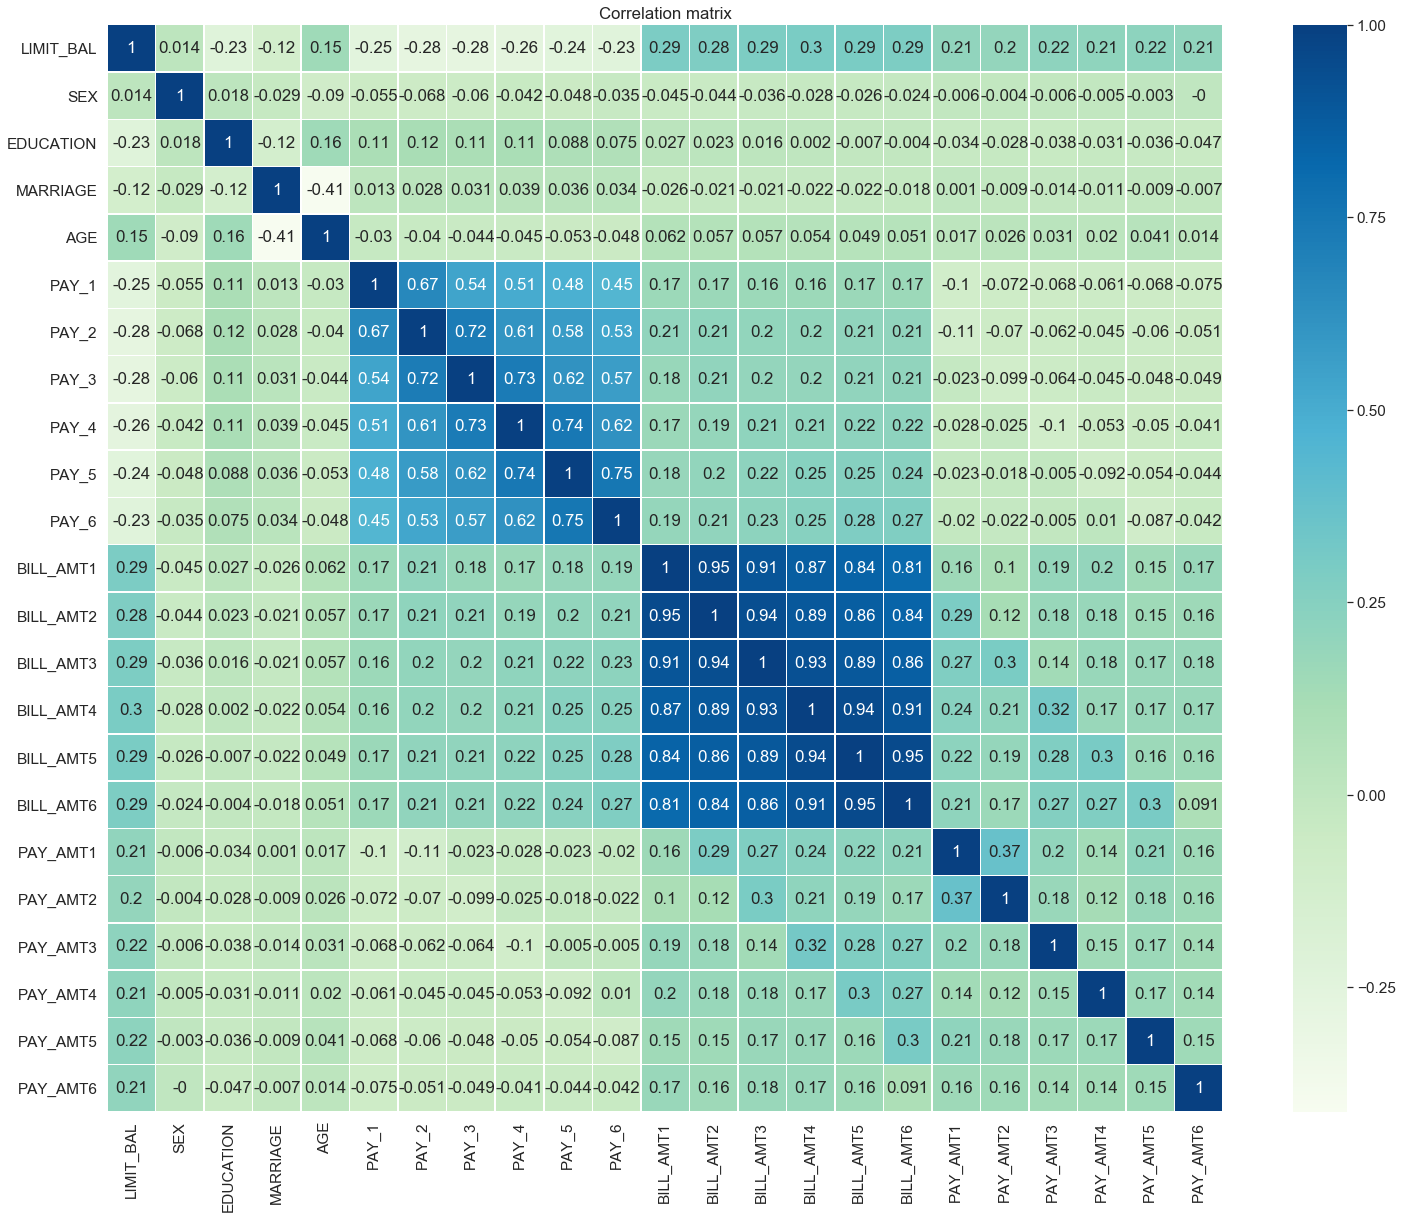

In [122]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df[BASE_FEATURE_NAMES].corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

In [181]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'NEXT_MONTH_DEFAULT', 'ID', 'IS_MALE', 'EDUCATION_1', 'EDUCATION_2',
       'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6',
       'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3', 'PAY_1_-1', 'PAY_1_0',
       'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_2_-1', 'PAY_2_0', 'PAY_2_1',
       'PAY_2_2', 'PAY_2_3', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_4_-1', 'PAY_4_0', 'PAY_4_2', 'PAY_4_3', 'PAY_5_-1',
       'PAY_5_0', 'PAY_5_2', 'PAY_5_3', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2',
       'PAY_6_3'],
      dtype='object')

PCA признаки

In [179]:
from sklearn.decomposition import PCA 

In [183]:
pca = PCA(n_components=2)
X= pca.fit_transform(df.loc[:,['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].values)

новые признаки

In [184]:
X

array([[ -29027.70993225,   12560.9888185 ],
       [ -34594.77749071,   -5280.68029069],
       [-100247.37209907,  -12597.92495231],
       ...,
       [-107983.54324399,   -3490.63437   ],
       [ 558791.00670101,   29072.90270488],
       [ -14606.95819021,  -14700.70533788]])

In [186]:
df['new_f1_pca']=X[:,0]
df['new_f2_pca']=X[:,1]

Пробел по регрессии

1) сделаю пример с пропуском типа nan

In [265]:
df['new_im'] = df['LIMIT_BAL'].values

In [266]:
ind_imp = [10,20,30,40,50,60]+np.random.randint(0,1000,(20)).tolist()
df['new_im'].iloc[ind_imp] = np.nan

посмотрим на них

In [267]:
df.iloc[ind_imp,:]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_0,PAY_5_2,PAY_5_3,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,new_im,new_f1_pca,new_f2_pca
10,420000.0,2,2,1,29,0,0,0,0,0,...,1,0,0,0,1,0,0,NaN,314419.106414,-265059.381689
20,80000.0,1,2,2,31,0,0,0,0,3,...,0,0,1,0,0,1,0,NaN,20171.988410,-19491.812260
30,200000.0,2,3,2,25,-1,-1,-1,0,-1,...,0,0,0,1,0,0,0,NaN,-107049.108942,368.719748
40,360000.0,1,1,1,38,-1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-108669.054619,-620.489344
50,20000.0,2,2,1,36,1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-111263.613647,-1190.379636
60,20000.0,1,2,1,45,-1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-117463.080808,9780.880264
524,50000.0,2,2,1,27,0,0,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-101746.451682,5610.078746
736,350000.0,1,1,1,38,1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-111202.632332,-1195.812454
651,260000.0,2,2,2,29,-1,-1,-1,0,0,...,1,0,0,1,0,0,0,NaN,-104169.294767,-2457.969870
194,300000.0,2,1,2,30,-1,-1,-1,-1,-1,...,0,0,0,1,0,0,0,NaN,-106448.558251,-2364.766864


составляю список переменных для работы при заполнении пробелов:
    - без пропусков
    - обработать признаки для запуска моделей (например преобразовать категориальные, тут не делаю, но делать нужно)

In [268]:
list_not_imp = df[BASE_FEATURE_NAMES].columns[np.where((df[BASE_FEATURE_NAMES].count()-df.shape[0])==0)[0]]

In [269]:
list_not_imp

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

Создаю моджели для обработки и предсказания пробелов

In [270]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


rrf = RandomForestRegressor()
sclx = StandardScaler()
scly = StandardScaler()


2) делим данные на входные и выходные (не забываю выбросить LIMIT_BAL - т.к. предсказываю его)

In [271]:
X_train_test_predict_imp = df[list_not_imp[1:]].iloc[:,:]
y_train_test_predict_imp = df['new_im'].iloc[:]

3) Находим пропуски и делим данные на данные для предсказания (X_predict) и набор для построения модели (X_train_test,y_train_test)

In [272]:
ind_imp_pred = np.where(y_train_test_predict_imp.isna()==True)[0]
X_predict= X_train_test_predict_imp.iloc[ind_imp_pred,:]

ind_imp_test_train = np.where(y_train_test_predict_imp.isna() == False)[0]
X_train_test= X_train_test_predict_imp.iloc[ind_imp_test_train,:]
y_train_test= y_train_test_predict_imp.iloc[ind_imp_test_train]

In [273]:
X_predict.shape

(26, 22)

4) строим набор для обучения и контроля

In [274]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_test, y_train_test, test_size=0.2)

5) обучаем

In [275]:
sclx.fit(X_train)
scly.fit(y_train.values.reshape((-1,1)))
rrf.fit(sclx.transform(X_train), scly.transform(y_train.values.reshape((-1,1))))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

6) проверяем

In [276]:
y_val=scly.inverse_transform(rrf.predict(sclx.transform(X_test)))

print(mean_absolute_error(y_val,y_test))

68892.69484859332


7) предсказываем и сделаем сравнение истинного значения и заполнения по регрессиии 

In [278]:
df['new_im'].values[ind_imp_pred]=scly.inverse_transform(rrf.predict(sclx.transform(X_predict)))


df.loc[ind_imp_pred,['LIMIT_BAL','new_im']].head()

,LIMIT_BAL,new_im
10,420000.0,322700.0
20,80000.0,132700.0
28,140000.0,176100.0
30,200000.0,123500.0
40,360000.0,298400.0


не все удачно, но не безнадежно:)

Пропуски можно обработать по автомату из sklearn.impute: https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py

Варианты заполнений :
sklearn.impute.SimpleImputer (заполняем значением) - https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer
sklearn.impute.KNNImputer (по ближайшим соседям без пробела) https://scikit- learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer
sklearn.impute.IterativeImputer (): https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html#sklearn.impute.IterativeImputer